In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)

In [2]:
non_super_users_df = pd.read_parquet("../data_users/NonSuperUserIds.parquet")
super_users_df = pd.read_parquet("../data_users/SuperUserIds.parquet")
print(non_super_users_df.shape)
print(non_super_users_df.head())

(22053173, 2)
    Id            CreationDate
18   2 2008-07-31 14:22:31.287
19   3 2008-07-31 14:22:31.287
22   8 2008-07-31 21:33:24.057
24  10 2008-07-31 21:57:06.240
25  11 2008-08-01 00:59:11.147


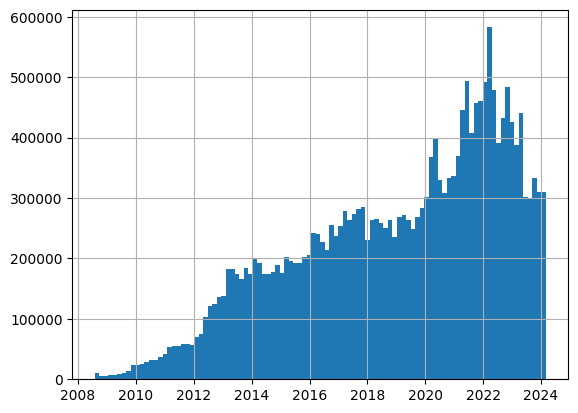

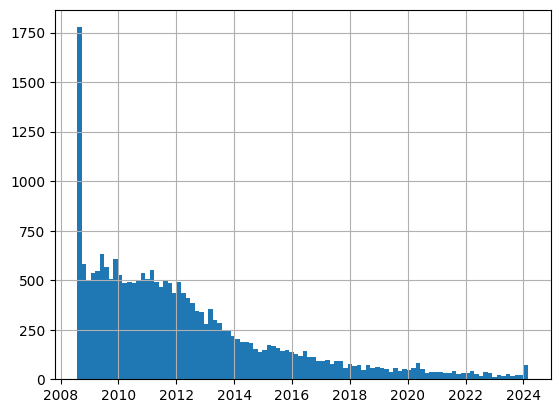

In [3]:
# histogram of CreationDate
non_super_users_df["CreationDate"] = pd.to_datetime(non_super_users_df["CreationDate"])
non_super_users_df["CreationDate"].hist(bins=100)
plt.show()

super_users_df["CreationDate"] = pd.to_datetime(super_users_df["CreationDate"])
super_users_df["CreationDate"].hist(bins=100)
plt.show()

(2205309, 3)
         Id            CreationDate CreationYearMonth
12851  1547 2008-08-16 14:46:57.293           2008-08
8256   2897 2008-08-25 20:17:12.620           2008-08
3748    919 2008-08-10 12:27:07.967           2008-08
6478   1131 2008-08-12 17:04:04.647           2008-08
19464  2134 2008-08-20 13:58:24.753           2008-08


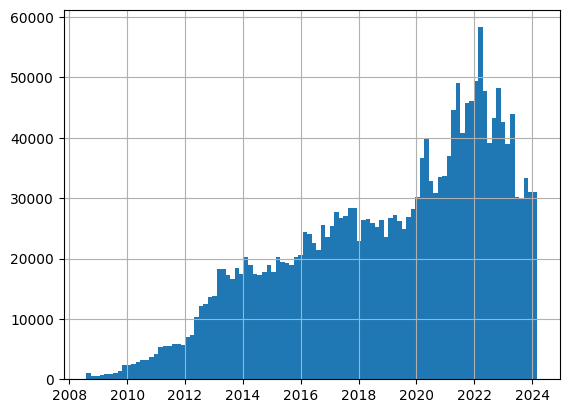

In [ ]:
# for non super users, new column of creation year-month truncated by month
non_super_users_df["CreationYearMonth"] = non_super_users_df["CreationDate"].dt.to_period("M")
# for each year-month, sample 1% of users randomly
non_super_sample = []
sample_size = 0.1
for year_month, group in non_super_users_df.groupby("CreationYearMonth"):
    non_super_sample.append(group.sample(frac=sample_size))
non_super_sample_df = pd.concat(non_super_sample)
print(non_super_sample_df.shape)
print(non_super_sample_df.head())
# save ids to parquet
non_super_sample_df[["Id"]].to_parquet(f"../data_users/NonSuperUserIdsSample_{sample_size}.parquet")

# plotting to see if the distribution makes sense
non_super_sample_df["CreationDate"].hist(bins=100)
plt.show()